<h1> <center> Sales Analysis of Super Store 

<h2> Objectives of this Project

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

- What is the overall sales trend?

- Which are the Top 10 products by sales?

- Which are the Most Selling Products?

- Which is the most preferred Ship Mode?

- Which are the Most Profitable Category and Sub-Category?

<h4> IMPORTING REQUIRED LIBRARIES

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualisation

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h4> IMPORTING THE DATASET

In [4]:
# Importing dataset
df = pd.read_excel('superstore_sales.xlsx') # Here I took data from Kaggle

In [5]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


<H3> DATA AUDIT

To get a quick idea of what the data looks like, we can call the head function on the data frame. By default, this returns the top five rows, but it can take in a parameter of how many rows to return.

In [8]:
# First five rows of the dataset
df.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,2011
6,CA-2011-1510,2011-01-02,2011-01-06,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314.220,1,0.0,3.120,24.10,Medium,2011
7,IN-2011-79397,2011-01-03,2011-01-03,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276.102,1,0.1,110.412,125.32,Critical,2011
8,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.456,4,0.4,-319.464,107.10,Low,2011
9,IZ-2011-4680,2011-01-03,2011-01-07,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",666.840,4,0.0,253.320,81.26,High,2011


In [4]:
# Last five rows of the dataset
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,IN-2014-62366,2014-06-19,2014-06-19,Same Day,Katrina Edelman,Corporate,Hiroshima,Japan,APAC,North Asia,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium,2014
51286,US-2014-102288,2014-06-20,2014-06-24,Standard Class,Zuschuss Carroll,Consumer,Texas,United States,US,Central,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium,2014
51287,US-2013-155768,2013-12-02,2013-12-02,Same Day,Laurel Beltran,Home Office,California,United States,US,West,...,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High,2013
51288,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,Ross Baird,Home Office,São Paulo,Brazil,LATAM,South,...,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium,2012
51289,MX-2012-134460,2012-05-22,2012-05-26,Second Class,Mick Crebagga,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.002,High,2012


In [10]:
# Shape of the dataset show number of rows and columns respectively 
df.shape

(51290, 21)

In [6]:
# show which are Columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

The data frame is a two-dimensional data structure and each column can have different types. To show that, we can call dtypes attribute on the data frame to see what each column types are.

In [7]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

Now we can do further analysis on our data to answer our questions. Before that, we should see if there are any missing values in our data set.To check if there are any missing values in the entire data set we use the isnull function, then see if there are any values.


In [8]:
# Checking missing values
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

As we observed that we don’t have any missing data, we can start doing further analysis on our data.

Now we can look at some descriptive statistics of the data frame with the describe method.

This shows some descriptive statistics on the data set. This only shows the statistics on the numerical columns. From here we can see the following statistics:

- Row count, which aligns to what the shape attribute showed us.
- The mean, or average.
- The standard deviation, or how spread out the data is.
- The minimum and maximum value of each column
- The number of items that fall within the first, second, and third percentiles.

In [9]:
# Generating descriptive statistics summary
df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


<h3> EXPLORATORY DATA ANALYSIS

- <h4> WHAT IS THE OVERALL SALES TREND?

In [11]:
# Getting month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [13]:
# grouping month_year by sales
df_temp = df.groupby('month_year').sum()['sales'].reset_index()

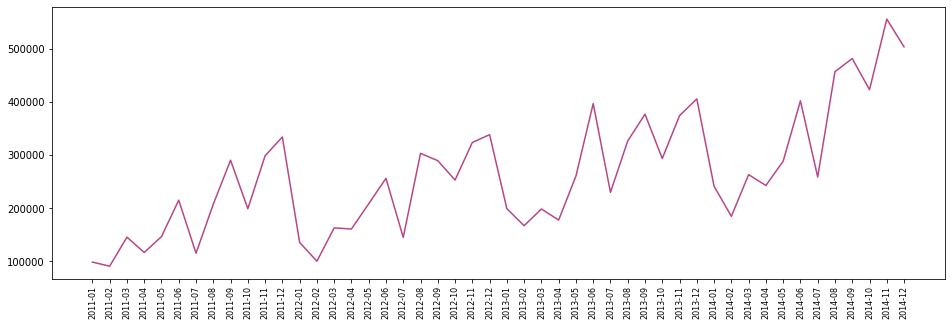

In [58]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b84585')
plt.xticks(rotation='vertical', size=8)
plt.show()

- <h4> WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [19]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['sales'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


- <h4> WHICH ARE THE MOST SELLING PRODUCTS?

In [20]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


- <h4> WHAT IS THE MOST PREFERRED SHIP MODE?

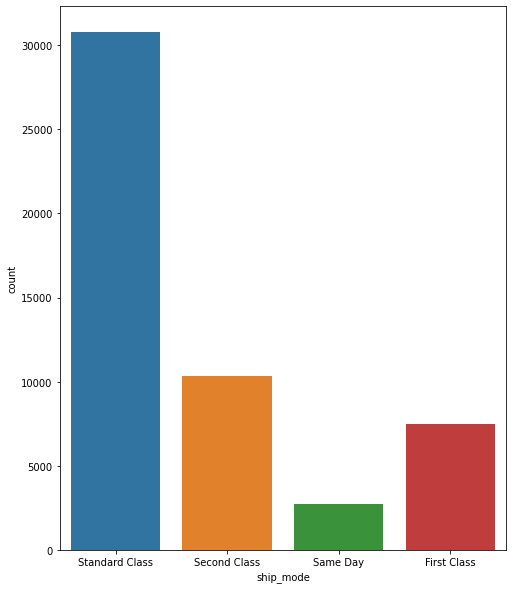

In [8]:
# Setting the figure size
plt.figure(figsize=(8, 10))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data=df)

# Display the figure
plt.show()

- <h4> WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [61]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Sorting the values
cat_subcat.sort_values(['category','profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

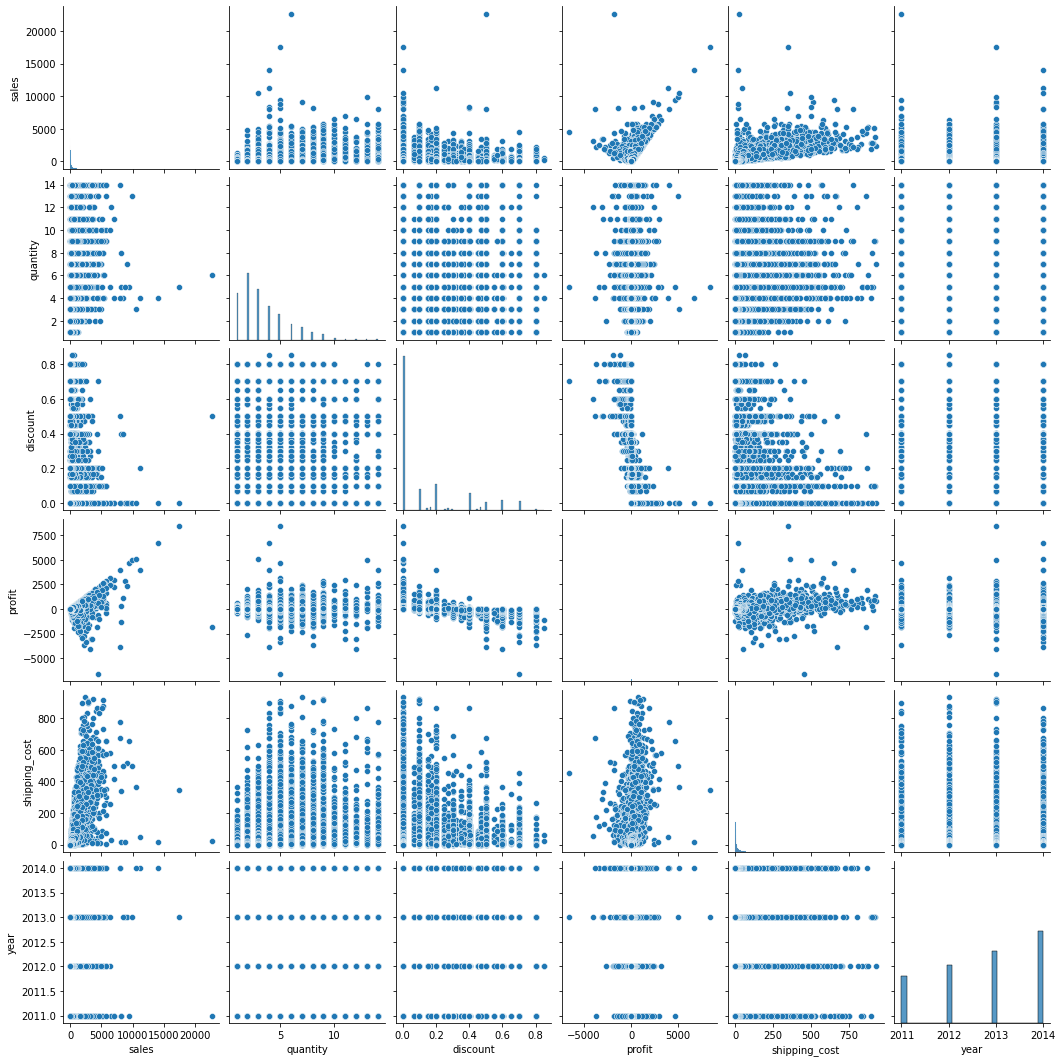

In [66]:
sns.pairplot(df)

In [82]:
a=df["product_name"].unique()  # shows the list of products that super store having
a

array(['Tenex Lockers, Blue', 'Acme Trimmer, High Speed',
       'Tenex Box, Single Width', ...,
       'Panasonic Business\xa0Telephones\xa0KX-T7736',
       'Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order',
       'Acco Glide Clips'], dtype=object)